In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
import spin_models as spin
import Merger_rate_plot as merg

In [2]:
plt.style.use(['science'])
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [3]:
import BH_binary_kicks_data as gw_kick
import BH_triple_kicks_data as sling_kick

In [4]:
df_gw = gw_kick.binary_kick_assign("Data/binary-merger-data.csv",)
df_gw.head()

,M1,M2,t_merger,Merger,Redshift,GW-kick-random-dry,GW-kick-aligned-5deg,GW-kick-aligned-cold,Type,BH1-ID,BH2-ID
0,2.261179e+06,1.629006e+06,8.587741e+08,Yes,6.459185,1167.138216,71.186426,180.837554,iso,9223372036326575607,9223372036365264250
1,1.614773e+06,1.077349e+06,8.934006e+08,Yes,6.265176,1254.661722,64.303166,751.700662,iso,9223372036330308081,9223372036383756962
2,6.554858e+06,1.175723e+06,4.120229e+09,Yes,1.587945,164.802792,214.105282,283.370450,iso,9223372036306477048,9223372036351439102
3,7.039616e+06,6.263608e+06,8.933714e+10,No,0.000000,954.701021,45.433298,1030.402182,iso,9223372036312285311,9223372036346956171
4,1.179139e+07,3.306548e+06,1.421714e+10,No,0.000000,289.634104,158.200539,184.326292,iso,9223372036300488336,9223372036365264250


In [5]:
df_sling = sling_kick.trip_kick_assign("Data/Triple_outcomes_N_50.csv")
df_sling.head()

,M1,qin,qout,z_triple,flag,Slingshot_kick,gw_kick_random,gw_kick_cold,gw_kick_5deg
0,2.150737e+07,0.381485,1.775986,3.257459,No,1376.742813,0.000000,0.000000,0.000000
1,1.546540e+08,0.272335,1.592074,1.101818,No,523.679371,0.000000,0.000000,0.000000
2,1.837358e+08,0.394991,0.181575,2.201414,Tr-ej,1132.847073,226.163662,107.143585,364.185343
3,8.736168e+07,0.273231,0.019927,3.276165,No,0.000000,0.000000,0.000000,0.000000
4,9.436961e+06,0.106270,43.596403,1.320180,No,1654.998938,0.000000,0.000000,0.000000


In [249]:
thresholds = np.arange(300,2000,50)

In [250]:
N_slingshot_kick = []

for i in range(50):
    df_sling_i = df_sling[531*i:531*(i+1)]
    N_sling_i = []
    for threshold in thresholds:
        N_sling_i.append(len(df_sling_i[df_sling_i["Slingshot_kick"] > threshold]))
    N_slingshot_kick.append(N_sling_i)

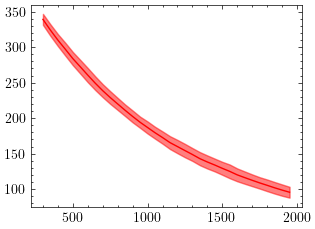

In [251]:
N_slingshot_kick = np.array(N_slingshot_kick)

plt.plot(thresholds,np.mean(N_slingshot_kick,axis=0),color="red")
plt.fill_between(thresholds,np.mean(N_slingshot_kick,axis=0)-np.std(N_slingshot_kick,axis=0),np.mean(N_slingshot_kick,axis=0)+np.std(N_slingshot_kick,axis=0),color="red",alpha=0.5)

In [252]:
N_random = []
N_deg5 = []
N_cold = []

for i in range(50):
    
    N_randi = []
    N_deg5i = []
    N_coldi = []
    df_sling_i = df_sling[531*i:531*(i+1)]

    for thresh in thresholds:
        N_randi.append(len(df_sling_i[df_sling_i["gw_kick_random"] > thresh]) + len(df_gw[df_gw["GW-kick-random-dry"] > thresh]))
        N_deg5i.append(len(df_sling_i[df_sling_i["gw_kick_5deg"] > thresh]) + len(df_gw[df_gw["GW-kick-aligned-5deg"] > thresh]))
        N_coldi.append(len(df_sling_i[df_sling_i["gw_kick_cold"] > thresh]) + len(df_gw[df_gw["GW-kick-aligned-cold"] > thresh]))

    N_random.append(N_randi)
    N_deg5.append(N_deg5i)
    N_cold.append(N_coldi)

In [253]:
N_random = np.array(N_random)
N_deg5 = np.array(N_deg5)
N_cold = np.array(N_cold)

(300.0, 700.0)

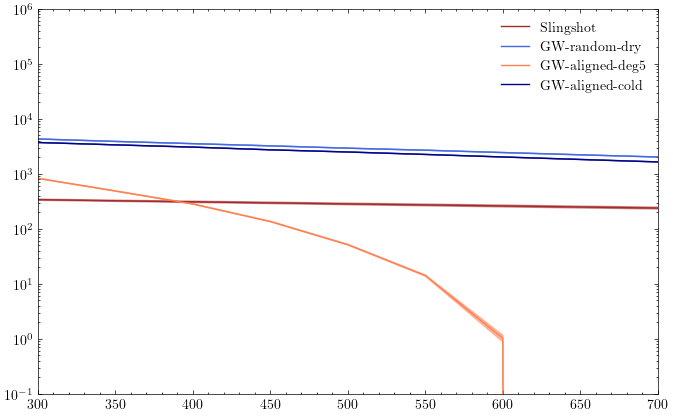

In [261]:

plt.figure(figsize=[8,5])
plt.plot(thresholds,np.mean(N_slingshot_kick,axis=0),color="brown",label="Slingshot")
#plt.scatter(thresholds,np.mean(N_slingshot_kick,axis=0),color="brown")
plt.fill_between(thresholds,np.mean(N_slingshot_kick,axis=0)-np.std(N_slingshot_kick,axis=0),np.mean(N_slingshot_kick,axis=0)+np.std(N_slingshot_kick,axis=0),color="brown",alpha=0.5)

plt.plot(thresholds,np.mean(N_random,axis=0),color="royalblue",label="GW-random-dry")
#plt.scatter(thresholds,np.mean(N_random,axis=0),color="royalblue")
plt.fill_between(thresholds,np.mean(N_random,axis=0)-np.std(N_random,axis=0),np.mean(N_random,axis=0)+np.std(N_random,axis=0),color="royalblue",alpha=0.5)

plt.plot(thresholds,np.mean(N_deg5,axis=0),color="coral",label="GW-aligned-deg5")
#plt.scatter(thresholds,np.mean(N_deg5,axis=0),color="brown")
plt.fill_between(thresholds,np.mean(N_deg5,axis=0)-np.std(N_deg5,axis=0),np.mean(N_deg5,axis=0)+np.std(N_deg5,axis=0),color="coral",alpha=0.5)
#plt.ylim(0,)

plt.plot(thresholds,np.mean(N_cold,axis=0),color="darkblue",label="GW-aligned-cold")
#plt.scatter(thresholds,np.mean(N_cold,axis=0),color="darkblue")
plt.fill_between(thresholds,np.mean(N_cold,axis=0)-np.std(N_cold,axis=0),np.mean(N_cold,axis=0)+np.std(N_cold,axis=0),color="darkblue",alpha=0.5)

#plt.xscale("log")
plt.ylim(0,)
plt.legend()
plt.yscale("log")
#plt.xscale("log")
plt.ylim(10**-1,10**6)
plt.xlim(300,700)

(0.0, 873.8959440278612)

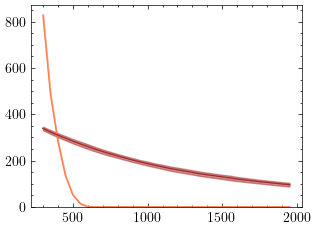

In [182]:
plt.plot(thresholds,np.mean(N_deg5,axis=0),color="coral",label="GW-aligned-deg5")
#plt.scatter(thresholds,np.mean(N_deg5,axis=0),color="brown")
plt.fill_between(thresholds,np.mean(N_deg5,axis=0)-np.std(N_deg5,axis=0),np.mean(N_deg5,axis=0)+np.std(N_deg5,axis=0),color="coral",alpha=0.5)

plt.plot(thresholds,np.mean(N_slingshot_kick,axis=0),color="brown",label="Slingshot")
#plt.scatter(thresholds,np.mean(N_slingshot_kick,axis=0),color="brown")
plt.fill_between(thresholds,np.mean(N_slingshot_kick,axis=0)-np.std(N_slingshot_kick,axis=0),np.mean(N_slingshot_kick,axis=0)+np.std(N_slingshot_kick,axis=0),color="brown",alpha=0.5)
plt.ylim(0,)

In [185]:
thresholds = np.arange(300,800,50)

In [186]:
slingshot_rate = []

for i in range(50):
    df_sling_i = df_sling[531*i:531*(i+1)]
    N_sling_i = []
    for threshold in thresholds:
        z_sling_i= df_sling_i[df_sling_i['Slingshot_kick']>threshold]["z_triple"]
        merger_rate_sling,lgzbins_sling,dNdlogzdt_sling = merg.merger_rate_log_plot(z_sling_i,zmax=7,zbinsize=0.2,lgzbinsize=0.2,lgzmin=-3,lgzmax=1)
        N_sling_i.append(merger_rate_sling)

    slingshot_rate.append(N_sling_i)

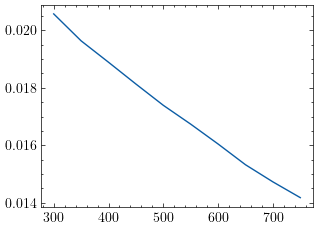

In [190]:
plt.plot(thresholds,np.mean(slingshot_rate,axis = 0))
#plt.yscale("log")

In [260]:
Nsling = []
Nrand = []
Ndeg5 = []
Ncold = []


for i in range(50):
    df_trip_i = df_sling[531*i:531*(i+1)]

    sling_rate = []
    random_rate = []
    deg5_rate=[]
    cold_rate = []

    for threshold in thresholds:
        #slingshot
        z_sling_i= df_trip_i[df_trip_i['Slingshot_kick']>threshold]["z_triple"]
        merger_rate_sling,lgzbins_sling,dNdlogzdt_sling = merg.merger_rate_log_plot(z_sling_i,zmax=7,zbinsize=0.2,lgzbinsize=0.2,lgzmin=-3,lgzmax=1)
        sling_rate.append(merger_rate_sling)

        #random
        z_trip_i= df_trip_i[(df_trip_i["flag"]!="No") & (df_trip_i["gw_kick_random"]>threshold)]["z_triple"].to_numpy()
        z_GW_rand = df_gw[(df_gw["GW-kick-random-dry"]>threshold) & (df_gw["Merger"]=="Yes")]["Redshift"].to_numpy()
        z_rand = np.concatenate((z_trip_i,z_GW_rand))
        merger_rate_rand,lgzbins_rand,dNdlogzdt_rand = merg.merger_rate_log_plot(z_rand,zmax=7,zbinsize=0.2,lgzbinsize=0.16,lgzmin=-3,lgzmax=1)
        random_rate.append(merger_rate_rand)

        #5deg
        z_trip_i= df_trip_i[(df_trip_i["flag"]!="No") & (df_trip_i["gw_kick_5deg"]>threshold)]["z_triple"].to_numpy()
        z_GW_5deg = df_gw[(df_gw["GW-kick-aligned-5deg"]>threshold) & (df_gw["Merger"]=="Yes")]["Redshift"].to_numpy()
        z_5deg = np.concatenate((z_trip_i,z_GW_5deg))
        merger_rate_5deg,lgzbins_5deg,dNdlogzdt_5deg = merg.merger_rate_log_plot(z_5deg,zmax=7,zbinsize=0.4,lgzbinsize=0.35,lgzmin=-3,lgzmax=1)
        deg5_rate.append(merger_rate_5deg)

        #cold
        z_trip_i= df_trip_i[(df_trip_i["flag"]!="No") & (df_trip_i["gw_kick_cold"]>threshold)]["z_triple"].to_numpy()
        z_GW_cold = df_gw[(df_gw["GW-kick-aligned-cold"]>threshold) & (df_gw["Merger"]=="Yes")]["Redshift"].to_numpy()
        z_cold = np.concatenate((z_trip_i,z_GW_cold))
        merger_rate_cold,lgzbins_cold,dNdlogzdt_cold = merg.merger_rate_log_plot(z_cold,zmax=7,zbinsize=0.2,lgzbinsize=0.16,lgzmin=-3,lgzmax=1)
        cold_rate.append(merger_rate_cold)
    
    Nsling.append(sling_rate)
    Nrand.append(random_rate)
    Ndeg5.append(deg5_rate)
    Ncold.append(cold_rate)

In [262]:
colo = ["royalblue","darkblue","brown","coral"]

In [263]:
colo[0]

'royalblue'

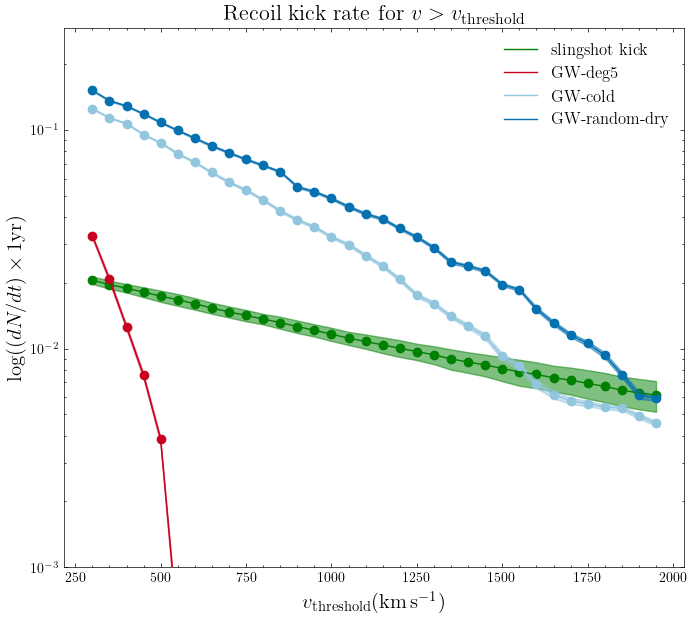

In [276]:
plt.figure(figsize=[8,7])

plt.plot(thresholds,np.mean(Nsling,axis = 0),color="green",label="slingshot kick")
plt.scatter(thresholds,np.mean(Nsling,axis = 0),color="green")
plt.fill_between(thresholds,np.mean(Nsling,axis = 0)-np.std(Nsling,axis = 0),np.mean(Nsling,axis = 0)+np.std(Nsling,axis = 0),color="green",alpha=0.5)
plt.plot(thresholds,np.mean(Ndeg5,axis = 0),color="#ca0020",label="GW-deg5")
plt.scatter(thresholds,np.mean(Ndeg5,axis = 0),color="#ca0020")
plt.fill_between(thresholds,np.mean(Ndeg5,axis = 0)-np.std(Ndeg5,axis = 0),np.mean(Ndeg5,axis = 0)+np.std(Ndeg5,axis = 0),color="#ca0020",alpha=0.5)
plt.plot(thresholds,np.mean(Ncold,axis = 0),color="#92c5de",label="GW-cold")
plt.fill_between(thresholds,np.mean(Ncold,axis = 0)-np.std(Ncold,axis = 0),np.mean(Ncold,axis = 0)+np.std(Ncold,axis = 0),color="#92c5de",alpha=0.5)
plt.scatter(thresholds,np.mean(Ncold,axis = 0),color="#92c5de")
plt.plot(thresholds,np.mean(Nrand,axis = 0),color="#0571b0",label="GW-random-dry")
plt.scatter(thresholds,np.mean(Nrand,axis = 0),color="#0571b0")
plt.fill_between(thresholds,np.mean(Nrand,axis = 0)-np.std(Nrand,axis = 0),np.mean(Nrand,axis = 0)+np.std(Nrand,axis = 0),color="#0571b0",alpha=0.5)
plt.yscale("log")
plt.ylim(10**-3,)
plt.legend(fontsize=12)
plt.xlabel(r"$v_{\text{threshold}} (\text{km} \, \text{s}^{-1})$",fontsize=15)
plt.ylabel(r"$\log((d N / d t) \times 1 \text{yr})$",fontsize=15)
plt.title(r"Recoil kick rate for $v > v_{\text{threshold}}$",fontsize=16)
plt.savefig("Figures/kick-rate-with-varying-threshold-300-to-800.pdf")

In [172]:
def find_q(M1,M2):
    if (M2>M1):
        q = M1/M2
    else:
        q = M2/M1
    
    return q

In [35]:
def v_GW_recoil(model,M1,M2):

    v_GW = []
    for i in range(len(M1)):

        S1,S2 = model()
        qi = find_q(M1[i],M2[i])
        v_GW.append(spin.gw_kick(qi,S1,S2))

    v_GW = np.array(v_GW)
    return v_GW

In [91]:
v_trial_rd = []

for i in range(5):
    v_gw = v_GW_recoil(spin.random_dry,M1,M2)
    v_random_abs = np.array([np.linalg.norm(v) for v in v_gw])
    v_trial_rd.append(v_random_abs)
    

In [ ]:
v_bin_count,v_bin_edges = np.histogram(v_trial_rd)

(array([1.000e+00, 4.200e+01, 4.902e+03, 2.617e+03, 1.172e+03, 3.680e+02,
        1.080e+02, 2.000e+01, 3.000e+00, 1.000e+00]),
 array([-426.11941051, -225.35868847,  -24.59796644,  176.1627556 ,
         376.92347764,  577.68419968,  778.44492172,  979.20564376,
        1179.9663658 , 1380.72708784, 1581.48780988]),
 <BarContainer object of 10 artists>)

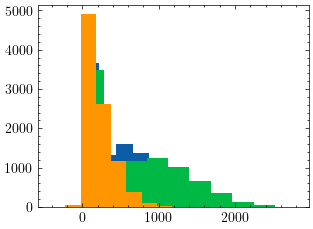

In [101]:
plt.hist(np.mean(v_trial_rd,axis=0),bins=10)
plt.hist(np.mean(v_trial_rd,axis=0)+np.std(v_trial_rd,axis=0),bins=10)
plt.hist(np.mean(v_trial_rd,axis=0)-np.std(v_trial_rd,axis=0),bins=10)

In [93]:
v_meanie = np.mean(v_trial_rd,axis=0)

In [86]:
v_random_abs = np.array([np.linalg.norm(v) for v in v_random])

In [87]:
v_thresh = np.arange(500,3000,50)

In [88]:
count = []
for vth in v_thresh:
    count.append(len(np.argwhere(v_random_abs>vth)))

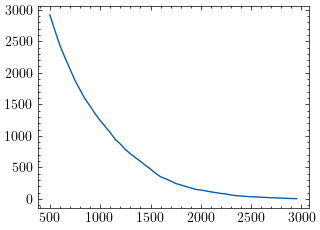

In [90]:
plt.plot(v_thresh,count)
#plt.yscale("log")

In [47]:
len(np.argwhere(np.abs(v_random)>600))

2338

(array([[0.000e+00, 6.000e+00, 3.400e+01, 1.040e+02, 2.350e+02, 4.190e+02,
         7.850e+02, 1.990e+03, 5.661e+03, 0.000e+00],
        [1.500e+01, 4.300e+01, 1.430e+02, 2.730e+02, 4.460e+02, 8.880e+02,
         1.688e+03, 3.854e+03, 1.884e+03, 0.000e+00],
        [3.000e+00, 1.100e+01, 3.300e+01, 1.140e+02, 2.190e+02, 4.220e+02,
         7.280e+02, 1.368e+03, 2.978e+03, 3.358e+03]]),
 array([-5.71383128, -4.79126464, -3.868698  , -2.94613136, -2.02356473,
        -1.10099809, -0.17843145,  0.74413519,  1.66670183,  2.58926847,
         3.5118351 ]),
 <a list of 3 BarContainer objects>)

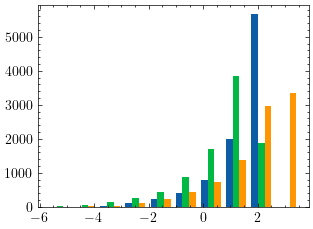

In [43]:
plt.hist(np.log10(np.abs(v_random)))

In [5]:
df_binary_GW = pd.read_csv("Data/binary-GW-kick-data.csv",index_col=False)
df_triple_GW = pd.read_csv("Data/triples-GW-kick-data.csv",index_col=False)

In [6]:
df_triple_slingshot = pd.read_csv("Data/triples-slingshot-data.csv",index_col=False)
df_triple_slingshot.head()

,Unnamed: 0,Mass 1,Mass 2,Mass 3,t_merger,Slingshot_kick,Flag
0,0,2.150737e+07,8.204738e+06,5.276829e+07,1.985633e+09,1802.260202,No
1,2,1.546540e+08,4.211761e+07,3.132749e+08,3.025313e+09,301.352009,No
2,3,1.546540e+08,4.211761e+07,3.132749e+08,1.972738e+09,192.293287,No
3,4,9.436961e+06,1.002870e+06,4.551391e+08,4.814316e+09,10529.351190,No
4,7,9.436961e+06,1.002870e+06,4.551391e+08,9.469051e+09,3388.800447,No


In [7]:
zmax = 7
zbinsize = 0.2
lgzbinsize=0.3
lgzmin=-3.0
lgzmax = 1.0

In [8]:
def slignshot_total_rate(Vesc):
        
        t_slinsghot = df_triple_slingshot[df_triple_slingshot['Slingshot_kick']>Vesc]["t_merger"].to_numpy()
        
        if(t_slinsghot.size == 0):
                return 0
        else:
               z_slingshot = z_at_value(cosmo.age,(t_slinsghot/10**9)*u.Gyr,zmin=1e-9)
               merger_rate_sling = merg.total_merger_rate(z_slingshot,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax)
               return merger_rate_sling


In [9]:
def kick_total_rate(Vesc,spin_type):

    #computes the total rate of GW Kicks for a given threshold rate
    #spin-type = aligned/random
    kick_column = 'GW-kick-'+spin_type
    t_triple_GW = df_triple_GW[df_triple_GW[kick_column]>Vesc]["t_merger"].to_numpy()
    
    if(t_triple_GW.size == 0):
        t_binary_GW = df_binary_GW[df_binary_GW[kick_column]>Vesc]["t_merger"].to_numpy()
        if(t_triple_GW.size == 0):
            return 0
        else:
            z_binary_GW = z_at_value(cosmo.age, (t_binary_GW/10**9)*u.Gyr,zmin=1e-9)
            merger_rate_GW = merg.total_merger_rate(z_binary_GW,zmax=7,zbinsize=0.2,lgzbinsize=0.5,lgzmin=-3,lgzmax=1)
            return merger_rate_GW
    else:
        z_triple_GW = z_at_value(cosmo.age, (t_triple_GW/10**9)*u.Gyr,zmin=1e-9)
        t_binary_GW = df_binary_GW[df_binary_GW[kick_column]>Vesc]["t_merger"].to_numpy()
        z_binary_GW = z_at_value(cosmo.age, (t_binary_GW/10**9)*u.Gyr,zmin=1e-9)
        z_GW = np.concatenate((z_binary_GW,z_triple_GW))
        merger_rate_GW = merg.total_merger_rate(z_GW,zmax=7,zbinsize=0.2,lgzbinsize=0.5,lgzmin=-3,lgzmax=1)
        return merger_rate_GW

In [10]:
vesc = np.arange(100,1500,100)

In [11]:
GW_aligned_rates = []
GW_random_rates = []
slingshot_rates = []

In [12]:
for i in range(len(vesc)):
    slingshot_rates.append(slignshot_total_rate(vesc[i]))
    GW_aligned_rates.append(kick_total_rate(vesc[i],'aligned'))
    GW_random_rates.append(kick_total_rate(vesc[i],'random'))

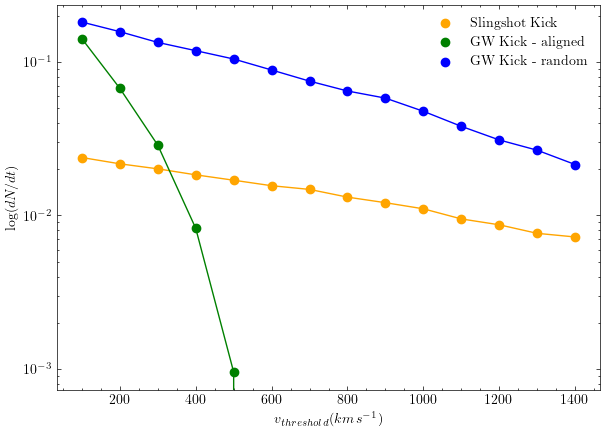

In [16]:
plt.figure(figsize=[7,5])
plt.plot(vesc,slingshot_rates,color="orange")
plt.scatter(vesc,slingshot_rates,color="orange",label="Slingshot Kick")
plt.plot(vesc,GW_aligned_rates,color="green")
plt.scatter(vesc,GW_aligned_rates,color="green",label="GW Kick - aligned")
plt.plot(vesc,GW_random_rates,color="blue")
plt.scatter(vesc,GW_random_rates,color="blue",label="GW Kick - random")
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.xlabel("$v_{threshold} (km \, s^{-1})$")
plt.ylabel("log($d N / d t)$")
plt.savefig("Figures/kick-rate-with-varying-threshold.pdf")